In [1]:
%pylab inline
import pandas as pd
import numpy as np
import sys


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Load data and order by species
species_list = [item.strip() for item in open("../tss-testing/species_order.txt", "r").readlines()]
species_order = dict(zip(species_list, range(1, len(species_list)+1)))

col_name = ["name","homopolymers","dinucleotide","trinucleotide","tetranucleotide","pentanucleotide","hexanucleotide","per1.perc","per2.perc","per3.perc","per4.perc","per5.perc","per6.perc","genome_length","str_base","str.perc.bp","str.num","str.density"]
data = pd.read_csv("/storage/mgymrek/TReeofLife/SnakemakeTest/organize.csv" ,header = None, names = col_name)
data["order"] = data["name"].apply(lambda x: species_order[x])
data = data.sort_values("order")

rmspecies = ["eboVir3", "wuhCor1"]
data = data[~data["name"].isin(rmspecies)].drop_duplicates()

Populating the interactive namespace from numpy and matplotlib


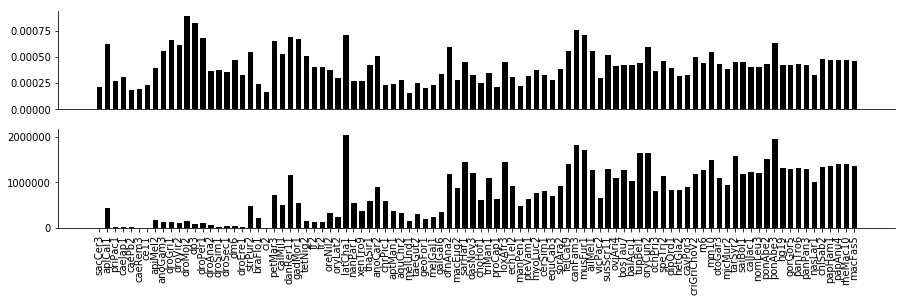

In [5]:
fig = plt.figure()
fig.set_size_inches((15, 4))

ax = fig.add_subplot(211)
ax.bar(range(data.shape[0]), data["str.density"], color="black", edgecolor="white");
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks([])
fig.savefig("pdfs/STREvolution-Fig1-STRDensity.pdf")

ax = fig.add_subplot(212)
ax.bar(range(data.shape[0]), data["str.num"], color="black", edgecolor="white");
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(range(data.shape[0]))
ax.set_xticklabels(data["name"], rotation=90);
fig.savefig("pdfs/STREvolution-Fig1-STRNum.pdf")

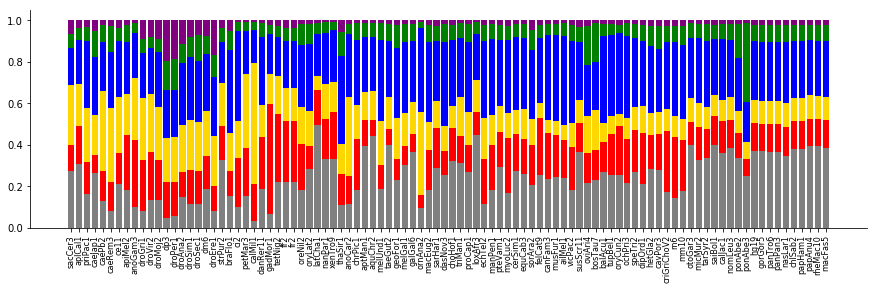

In [3]:
fig = plt.figure()
fig.set_size_inches((15, 4))
ax = fig.add_subplot(111)

bottoms = np.array([0]*data.shape[0])

percolors = ["gray","red","gold","blue","green","purple"]

for period in range(1, 7):
    values = np.array(data["per%s.perc"%period])
    ax.bar(range(len(values)), values, color=percolors[period-1], bottom=bottoms)
    bottoms = bottoms+values
    
ax.set_xticks(range(len(bottoms)))
ax.set_xticklabels(data["name"], rotation=90, size=8);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig("pdfs/STREvolution-Fig1-Periods.pdf")